<a href="https://colab.research.google.com/github/sgr1118/GD-NLP-Theory/blob/main/GD4_news_category_Multiclass_Classification_theory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4-1. 들어가며

1. 머신러닝을 이용한 텍스트 분류

텍스트 분류(Text Classification)란 주어진 텍스트를 사전 정의된 클래스(Pre-defined Class)들로 분류하는 자연어 처리 태스크입니다. 이 태스크는 자연어 처리 태스크 중 가장 기본이 되면서, 비즈니스 영역에서도 가장 수요가 높습니다.

우리가 평소에 쉽게 접할 수 있는 텍스트 분류의 영역으로는 '스팸 메일 자동 분류', '사용자의 리뷰로부터 긍정, 부정을 판단하는 감성 분류', '포털 사이트가 언론사의 뉴스들을 문화, 정치 등으로 자동 분류하여 보여주는 뉴스 카테고리 분류' 등이 있습니다.

이러한 분류들을 AI 알고리즘을 통해 수행할 때는 일반적으로 아래와 같은 과정을 거칩니다.

![](https://d3s0tskafalll9.cloudfront.net/media/images/GN-2-P-4.img1.max-800x600.png)
<center>AI 알고리즘 과정</center>

주어진 문장 또는 문서를 벡터화하고, 이를 AI 모델에 입력값으로 넣어주면 모델은 예측한 카테고리를 리턴하게 되죠. 만약 딥러닝 모델을 사용한다면 벡터화 방법으로는 워드 임베딩을 사용하고, RNN, CNN, BERT와 같은 딥러닝 모델을 사용해서 클래스를 예측할 수 있을 거예요.

하지만 AI 알고리즘에는 딥러닝이 아닌 다른 우수한 수많은 머신러닝 알고리즘들도 존재합니다. 오늘은 딥러닝이 아니라 여러 머신러닝 알고리즘을 사용해서 텍스트를 분류해 보겠습니다. 딥러닝을 사용하지 않는 상황에서 텍스트를 벡터화하여 좋은 feature를 뽑아내기 위하여, 이전 노드에서 다루었던 내용들이 어떻게 활용되는지 경험해 볼 수 있을 것입니다.

텍스트 분류에는 여러 종류가 있는데, 그 중 대표적인 것으로는 클래스가 2개인 경우인 이진 분류(Binary Classification)와 클래스 3개 이상인 경우인 다중 클래스 분류(Multiclass Classification)가 있습니다. 메일이 스팸인지 아닌지를 결정하는 스팸 메일 분류기가 이진 분류의 대표적인 예입니다. 오늘 우리가 하게 될 텍스트 분류는 다중 클래스 분류(Multiclass Classification)에 속하는데 구체적인 내용은 데이터를 살펴보면서 이해해 보겠습니다.

2. 학습 목표

(1) 로이터 뉴스 데이터 이해하기

(2) F1-score와 confusion matrix 출력해보기

(3) 여러 머신러닝 모델에 대해서 성능 비교해보기

(4) 단어 수에 따른 성능 비교해보기





# 4-2. 로이터 뉴스 데이터 (1) 데이터 확인하기

로이터 뉴스 데이터는 총 46개의 클래스로 구성, 해당 뉴스가 어느 카테고리에 속하는지를 예측하기 위한 데이터

In [ ]:
# 데이터 및 라이브러리 불러오기

from tensorflow.keras.datasets import reuters
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

훈련 데이터와 테스트 데이터 로드하기

In [ ]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words = 10000, test_split=0.2)

2121728/2110848 [==============================] - 0s 0us/step


num_words는 이 데이터에서 빈도수 기준으로 상위 몇 번째 단어까지 사용할 것인지 조절합니다. 각 단어는 고유한 번호가 정해져 있는 상태이고, 이를 통해서 사용할 단어의 수를 정합니다.

이 데이터의 단어들은 등장 빈도수가 높은 순서대로 낮은 정수가 맵핑되어 있습니다. 예를 들어서 50번 단어보다는 10번 단어가 데이터 전체에서 빈도수가 등장 빈도 순위로 40등이 더 높은 단어입니다. 위에서 num_words=10000은 1~10,000번 단어만 사용한다는 의미입니다. 등장 빈도수가 높은 단어들만 사용하겠다는 의미지요.

주의할 점은 데이터를 받아올 때, num_words의 인자로 10,000을 기재한다고 해서 10,000보다 높은 정수가 맵핑된 단어들이 받아온 데이터에서 사라지는 게 아니라는 겁니다. num_words로 주어진 값보다 큰 번호를 가졌던 단어들은 특정 번호로 전부 맵핑이 됩니다. 이는 OOV 문제라는 자연어 처리의 대표적인 문제와 연관이 있는데요. 이에 대해서는 뒤에서 언급하겠습니다.

In [ ]:
print('훈련 샘플의 수: {}'.format(len(x_train)))
print('테스트 샘플의 수: {}'.format(len(x_test)))

훈련 샘플의 수: 8982
테스트 샘플의 수: 2246


데이터 출력해보기

우리는 뉴스 데이터를 다루기로 했는데, 실제 출력해보면 텍스트가 아니라 숫자 시퀀스가 출력됩니다. 각 단어가 빈도수가 높은 순서대로 낮은 정수가 맵핑되어 있다고 했었는데, 이미 뉴스 데이터를 다운로드할 때는 단어가 아니라 해당 번호로 변환이 되어서 출력됩니다.

대부분의 자연어 처리에서는 텍스트를 숫자로 수치화하는 과정이 필요한데, 텐서플로우 데이터셋에서는 이미 전처리를 한 데이터를 제공해 주는 셈입니다.

이제 레이블도 출력해 볼까요? 첫 번째 훈련용 뉴스와 테스트용 뉴스의 레이블을 출력해봅시다.



In [ ]:
print(x_train[0])
print(x_test[0])
print(y_train[0])
print(y_test[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
[1, 4, 1378, 2025, 9, 697, 4622, 111, 8, 25, 109, 29, 3650, 11, 150, 244, 364, 33, 30, 30, 1398, 333, 6, 2, 159, 9, 1084, 363, 13, 2, 71, 9, 2, 71, 117, 4, 225, 78, 206, 10, 9, 1214, 8, 4, 270, 5, 2, 7, 748, 48, 9, 2, 7, 207, 1451, 966, 1864, 793, 97, 133, 336, 7, 4, 493, 98, 273, 104, 284, 25, 39, 338, 22, 905, 220, 3465, 644, 59, 20, 6, 119, 61, 11, 15, 58, 579, 26, 10, 67, 7, 4, 738, 98, 43, 88, 333, 722, 12, 20, 6, 19, 746, 35, 15, 10, 9, 1214, 855, 129, 783, 21, 4, 2280, 244, 364, 51, 16, 299, 452, 16, 515, 4, 99, 29, 5, 4, 364, 281, 48, 10, 9, 1214, 23, 644, 47, 20, 324, 27, 56, 2, 2, 5, 192, 510, 17, 12]
3
3


둘 다 숫자 3이 출력되네요. 각 뉴스는 정수로 된 레이블을 가지고 있군요. 이 레이블은 숫자 0부터 시작되므로, 모든 레이블 중 최댓값을 구하고 1을 더하면 현재 클래스의 개수를 볼 수 있어요.

In [ ]:
num_classes = max(y_train) + 1
print('클래스의 수 : {}'.format(num_classes))

클래스의 수 : 46


데이터 분포 확인해보기

훈련용 뉴스의 최대 길이 : 2376
훈련용 뉴스의 평군 길이 : 145.5398574927633


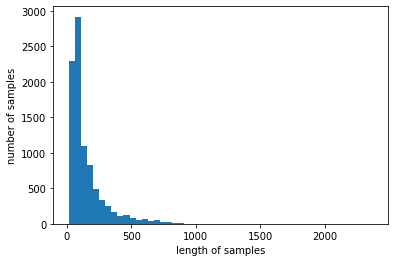

In [ ]:
print('훈련용 뉴스의 최대 길이 : {}'.format(max(len(l) for l in x_train)))
print('훈련용 뉴스의 평군 길이 : {}'.format(sum(map(len, x_train)) / len(x_train)))

plt.hist([len(s) for s in x_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

# 최대 길이에 비하여 평균길이는 많이 짧다.
# 클래스의 분포도 확인해봐야겠다.

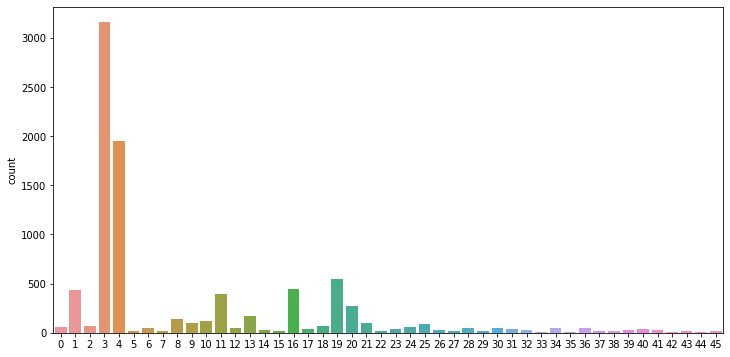

In [ ]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(12,6)
sns.countplot(x = y_train)
plt.show()

# 대부분 3, 4번 클래스가 높은 분포를 가지고있다.

In [ ]:
unique_elements, counts_elements = np.unique(y_train, return_counts = True)
print("각 클래스 빈도수:")
print(np.asarray((unique_elements, counts_elements)))

각 클래스 빈도수:
[[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
    14   15   16   17   18   19   20   21   22   23   24   25   26   27
    28   29   30   31   32   33   34   35   36   37   38   39   40   41
    42   43   44   45]
 [  55  432   74 3159 1949   17   48   16  139  101  124  390   49  172
    26   20  444   39   66  549  269  100   15   41   62   92   24   15
    48   19   45   39   32   11   50   10   49   19   19   24   36   30
    13   21   12   18]]


# 4-3. 로이터 뉴스 데이터 (2) 데이터 복원하기

1. 원본 뉴스 데이터로 복원해보기

이 뉴스 데이터는 어느 정도 전처리가 되어있어서 각 단어가 정수 시쿠너스로 변환된 채 제공되어있다. 하지만 일반적인 상황이라면 텍스트를 숫자로 수치호하는 과정을 처음부터 해야한다.

이번에는 정수 시퀀스를 변환된 데이터를 다시 텍스트로 되돌려본다.

로이터 뉴스 데이터는 '단어'를 key값으로, 고유한 '정수'를 value로 가지는 dictionary를 제공합니다. 이를 word_index로 저장해보겠습니다.

In [ ]:
word_index = reuters.get_word_index(path='reuters_word_index.json')

565248/550378 [==============================] - 0s 0us/step


In [ ]:
# 단어와 정수 맵핑 확인해보기
print(word_index['the'], word_index['it'])

1 13


그런데 지금 우리가 해야 할 일은 현재 갖고 있는 정수 시퀀스로 되어 있는 데이터를 텍스트 형태로 되돌려야 하는 일이므로 사실 word_index보다는 정수로부터 단어를 얻을 수 있는 index_word가 필요합니다.

그런데 이 데이터에는 숨겨진 비밀이 하나 있는데, 뉴스 데이터 안에서 단어 'the'는 사실 1번이 아니라 4번 단어입니다. 그리고 단어 'it'은 사실 13번 단어가 아니라 16번 단어입니다. 다른 단어들도 마찬가지로 word_index에 입력으로 했을 때, 얻는 숫자보다는 +3 을 한 숫자가 원래 고유한 숫자입니다. 이건 로이터 뉴스 데이터가 정의한 일종의 약속입니다.

reuters.get_word_index에는 실제 단어에 맵핑 한 정수에 -3을 한 정수를 입력해 놓았거든요. 그렇기 때문에 word_index에서 index_word를 만들 때, 각 정수에 +3을 해주어야 합니다

In [ ]:
index_to_word = {index+3 : word for word, index in word_index.items()}

In [ ]:
print(index_to_word[4])
print(index_to_word[16])

# the, it이 잘 출력됨 

the
it


이 데이터를 위해 약속된 비밀은 더 있습니다. 0번, 1번, 2번은 사실 각각 <pad>, <sos>, <unk>라는 자연어 처리를 위한 특별한 토큰들을 위해 맵핑된 번호입니다. 그래서 만들어진 index_to_word에 추가적으로 이 작업을 해주어야 진짜 index_to_word가 완성됩니다.

In [ ]:
# index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>를 넣어줍니다.
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token

In [ ]:
# 뉴스 기사 텍스트 복원

print(' '.join([index_to_word[index] for index in x_train[0]]))

<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


첫 번째 훈련용 뉴스 기사가 정수 시퀀스에서 텍스트로 복원되었습니다. 이 데이터도 어느 정도 전처리가 된 상태라서, 자연스럽게 읽히지는 않습니다. 하지만 문맥을 가진 텍스트이기 때문에, 이 데이터를 가지고 머신러닝을 시작해도 별 무리는 없어 보입니다.

복원된 첫 번째 훈련용 뉴스 기사에 특별 토큰인 <sos>와 <unk>가 보이는데, <sos>는 텍스트 분류를 위한 토큰이 아니므로 크게 신경을 쓰지 않아도 됩니다. 하지만 <unk>는 자연어 처리 전반에서 쓰이는 특별 토큰이므로 이에 대해서는 이해할 필요가 있습니다

2. OOV 문제와 UNK 토큰

기계가 알고 있는 단어들의 집합을 단어장(Vocabulary)이라고 합니다. 기계가 미처 배우지 못한 모르는 단어를 OOV(Out-Of-Vocabulary) 또는 UNK(Unknown) 이라고 표현합니다. 어떤 단어를 기계가 모르는 단어로 판단하면, 기계는 해당 단어를 전부 <unk>라는 일관된 특별 토큰으로 변환합니다.

num_words=10000는 정수 번호가 10,000이 넘는 단어들을 자동으로 <unk> 토큰으로 처리합니다. 로이터 뉴스 데이터에서 <unk>은 정수 2번을 가지도록 약속돼 있으므로 데이터를 로드하는 과정에서 정수 번호가 10,000이 넘는 단어들은 전부 정수 2로 변환되어서 로드가 되었던 것입니다

Q1. 로이터 뉴스 데이터 중 [4, 587, 23, 133, 6, 30, 515]인 정수 시퀀스가 있습니다. 현재 우리가 가진 index_word를 사용하여 이 정수 시퀀스를 텍스트 시퀀스로 변환해보세요.





In [ ]:
text = []
num = [4, 587, 23, 133, 6, 30, 515]
for i in num:
  text.append(index_to_word[i])

text

['the', 'transaction', 'is', 'expected', 'to', 'be', 'completed']

Q2. 데이터를 로드하기 전 로이터 뉴스 데이터에는 다음과 같은 정수 시퀀스가 있었다고 해봅시다.
[4, 12000, 23, 133, 6, 30, 515]
이 데이터를 로드한 데이터에서 우리가 저 문장을 출력하면 다른 정수 시퀀스가 출력되는데요. 해당 정수 시퀀스를 추측해 보세요.

[4, 2, 23, 133, 6, 30, 515]
12,000은 10,000을 넘는 숫자로 OOV에 해당되므로 <unk>인 2로 변환되어 데이터가 로드됩니다.

In [ ]:
# 훈련용 뉴스 데이터 정수 > 텍스트 데이터 변환

decoded = []
for i in range(len(x_train)):
  t = ' '.join([index_to_word[index] for index in x_train[i]])
  decoded.append(t)

x_train = decoded
print(len(x_train))

8982


In [ ]:
# 테스트용 뉴스 데이터 정수 > 텍스트 데이터 변환

decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded
print(len(x_test))

2246


In [ ]:
print(x_train[:5])
print(x_test[:5])

['<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3', '<sos> generale de banque sa lt <unk> br and lt heller overseas corp of chicago have each taken 50 pct stakes in <unk> company sa <unk> factors generale de banque said in a statement it gave no financial details of the transaction sa <unk> <unk> turnover in 1986 was 17 5 billion belgian francs reuter 3', '<sos> shr 3 28 dlrs vs 22 cts shr diluted 2 99 dlrs vs 22 cts net 46 0 mln vs 3 328 000 avg shrs 14 0 mln vs 15 2 mln year shr 5 41 dlrs vs 1 56 dlrs shr diluted 4 94 dlrs vs 1 50 dlrs net 78 2 mln vs 25 9 mln avg shrs 14 5 mln vs 15 1 mln note earnings per share reflect the two for one

4-4. 벡터화 하기

In [ ]:
# 필요한 라이브러리 불러오기

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

![](https://d3s0tskafalll9.cloudfront.net/media/images/GN-2-P-4.img1.max-800x600.png)
<center></center>

텍스트 데이터가 있을 때, 모델의 입력으로 넣기 위해서는 우선 각 문서를 벡터화할 필요가 있습니다. 항상 그런 것은 아니지만, 일반적으로 텍스트 분류를 할 모델로 인공 신경망을 사용하는 경우, 벡터화 방법 또한 인공 신경망을 사용하는 것이 보편적입니다. Word Embedding, Document Embedding, Contextual Embedding 등의 다양한 벡터화 방법이 존재하는데요.

이번 실습에서는 딥러닝이 아닌 머신러닝 방법을 사용하여 텍스트 분류를 진행할 예정이기 때문에 벡터화 방법도 인공 신경망이 아닌 방법을 사용하겠습니다. 저희가 사용할 벡터화 방법은 Bag of Words 가설을 기반으로 하는 DTM, TF-IDF 행렬입니다.

[위키독스 DTM](https://wikidocs.net/24559)

Q3. (O/X 퀴즈) 총 3개의 문서가 있습니다. 단어 단위로 토크나이징을 하였을 때, 첫 번째 문서의 길이가 3, 두 번째 문서의 길이가 2, 세 번째 문서의 길이가 4로 나왔습니다. 이 세 개의 문서로부터 만든 DTM의 열의 개수는 9입니다. (O/X)

- X,
DTM의 열의 개수는 중복을 제거한 단어들의 집합인 단어장(Vocabulary)의 크기를 가지므로 반드시 9라고 할 수는 없습니다. 문서 내 단어가 중복되어 있다면 9보다 작을 수 있습니다.

Q4. DTM을 기반으로 문서를 군집, 혹은 분류한다면 같은 단어가 많이 등장한 문서들일수록 그 유사도가 높다고 판단할 수 있습니다. 군집이나 분류 시에 이러한 가정을 사용한다면 성능을 저하시킬 수 있는 요소는 무엇일까요?

- 불용어는 모든 문서에 자주 등장하지만 실제로 중요한 의미를 가지지는 않으므로 이러한 가정에서는 성능 저하의 원인이 될 수 있습니다.


In [ ]:
# DTM 생성
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

(8982, 9670)


훈련용 뉴스의 수가 총 8,982개였기 때문에 DTM의 행의 개수는 8,982개가 됩니다. 그런데 이상한 점은 앞에서 데이터를 로드할 때, num_words=10,000이라는 값을 사용했음에도 DTM 열의 개수는 이보다 현저하게 적은 9,670개밖에 되지 않습니다. 그 이유는 DTM이 자체적인 규칙에 따라서 불필요하다고 판단하는 토큰들을 제거하기 때문입니다.

[위키독스 TF-IDF](https://wikidocs.net/31698)

Q5. (O/X 퀴즈) TF-IDF 행렬은 모든 문서에 걸쳐서 중요하다고 판단되는 단어에 가중치를 주는 효과를 가지고 있습니다. 만약, 모든 문서에 걸쳐서 자주 등장하는 단어라면 TF-IDF는 다른 단어들보다 상대적으로 높은 가중치를 주게 됩니다.

- X, 모든 문서에 걸쳐서 자주 등장하는 단어보다 특정 문서에 자주 등장하는 단어에 높은 가중치를 준다.

In [ ]:
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

(8982, 9670)


# 4-5. 나이브 베이즈 분류기

[나이브 베이즈 분류기 영상](https://youtu.be/3JWLIV3NaoQ)

In [ ]:
# 라이브러리 불러오기

from sklearn.naive_bayes import MultinomialNB #다항분포 나이브 베이즈 모델
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score # 정확도 계산

Q6. 모든 메일에는 같은 단어가 중복으로 등장하지 않는다고 가정하였을 때, 베이즈 정리만을 이용하여 coupon이라는 단어가 들어갔을 때 해당 메일 이 스팸 메일일 확률을 구해보세요. 가정은 아래와 같습니다!

총 8개의 메일 중에 4개의 메일이 스팸 메일입니다.
전체 메일 중에서 coupon이라는 단어가 들어간 메일은 3개입니다.
모든 스팸 메일 중에서 단어 coupon이 들어간 메일은 2개입니다

- 총 8개의 메일 중 4개의 메일이 스팸 메일이므로 P(spam) = 4/8 = 1/2
총 8개의 메일 중 3개의 메일이 coupon이라는 단어를 포함하므로 P(coupon) = 3/8
총 4개의 스팸 메일 중 2개의 메일이 coupon이라는 단어를 포함하므로 P(coupon | spam) = 2/4 = 1/2
P(coupon | spam)과 P(spam)를 곱한 후에 P(coupon)로 나눠줍니다. 정답은 2/3 즉, 66.7%입니다.

In [ ]:
# NB 모델

model = MultinomialNB()
model.fit(tfidfv, y_train)

MultinomialNB()

In [ ]:
# 정확한 정확도 측정을 위하여 테스트 데이터도 TF-IDF 행렬로 변환해야한다.

x_test_dtm = dtmvector.transform(x_test) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환

predicted = model.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.6567230632235085


In [ ]:
print(x_test[3], y_test[3])

# y_test[3]의 레이블은 4

<sos> <unk> <unk> oil and gas partnership said it completed the sale of interests in two major oil and gas fields to lt energy assets international corp for 21 mln dlrs the company said it sold about one half of its 50 pct interest in the oak hill and north <unk> fields its two largest producing properties it said it used about 20 mln dlrs of the proceeds to <unk> principal on its senior secured notes semi annual principal payments on the remaining 40 mln dlrs of notes have been satisfied until december 1988 as a result it said the company said the note agreements were amended to reflect an easing of some financial covenants and an increase of interest to 13 5 pct from 13 0 pct until december 1990 it said the <unk> exercise price for 1 125 000 warrants was also reduced to 50 cts from 1 50 dlrs the company said energy assets agreed to share the costs of increasing production at the oak hill field reuter 3 4


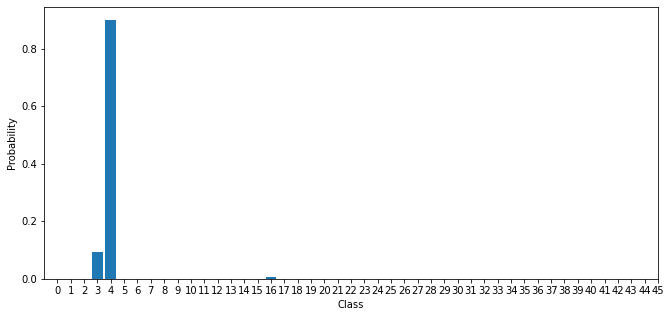

In [ ]:
# 모델 예측 시각화

probability_3 = model.predict_proba(tfidfv_test[3])[0]

plt.rcParams["figure.figsize"] = (11,5)
plt.bar(model.classes_, probability_3)
plt.xlim(-1, 21)
plt.xticks(model.classes_)
plt.xlabel("Class")
plt.ylabel("Probability")
plt.show()

In [ ]:
model.predict(tfidfv_test[3])

array([4])

모델은 4번 클래스를 약 90%의 확률로 확신하는데, 10%의 확률로 3번 클래스라고 판단합니다. 90%의 확률로 확신하므로 모델이 예측한 레이블은 4번입니다. 해당 샘플은 정확하게 예측했네요.

# 4-6. F1-Score, Confusion Matrix

In [ ]:
# 라이브러리 불러오기

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

1. Precision, Recall & F1 Score

[분류성능평가지표 - Precision(정밀도), Recall(재현율) and Accuracy(정확도)](https://sumniya.tistory.com/26)


Q7. Accuracy는 가장 직관적으로 모델의 성능을 나타낼 수 있는 평가 지표입니다. 하지만 [ ]인 경우를 제대로 고려하지 못하기 때문에, [ ]인 경우에는 이를 고려한 f1-score를 사용하기도 합니다. [ ]에 들어갈 설명은 무엇일까요

- 이진분류, label 불균형

사이킷런의 metrics 패키지에서는 정밀도, 재현율, F1점수를 구하는 classification_report() 함수를 제공합니다. 이 함수는 각각의 클래스를 양성(positive) 클래스로 보았을 때의 정밀도, 재현율, F1점수를 각각 구하고 그 평균값으로 전체 모델의 성능을 평가합니다.

In [ ]:
print(classification_report(y_test, model.predict(tfidfv_test), zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.62      0.69      0.65       105
           2       0.00      0.00      0.00        20
           3       0.81      0.90      0.85       813
           4       0.51      0.96      0.67       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       1.00      0.08      0.15        25
          10       0.00      0.00      0.00        30
          11       0.66      0.63      0.64        83
          12       0.00      0.00      0.00        13
          13       1.00      0.03      0.05        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.69      0.56      0.61        99
          17       0.00    

2. Confusion Matrix

[Confusion Matrix 영상](https://youtu.be/M0GBAzFV9_A)

Q8. TP와 FN에 대해서 각각 설명해보세요.

- TP : 양성이라고 예측할 때 실제로 양성인 것
- FN : 음성이라고 예측할 때 실제로 양성인 것

In [ ]:
# confusion matrix 시각화

def graph_confusion_matrix(model, x_test, y_test):
  df_cm = pd.DataFrame(confusion_matrix(y_test, model.predict(x_test)))
  fig = plt.figure(figsize=(12,12))
  heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
  heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation = 0, ha='right', fontsize=12)
  heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation = 45, ha='right', fontsize=12)
  plt.ylabel('label')
  plt.xlabel('predicted value')

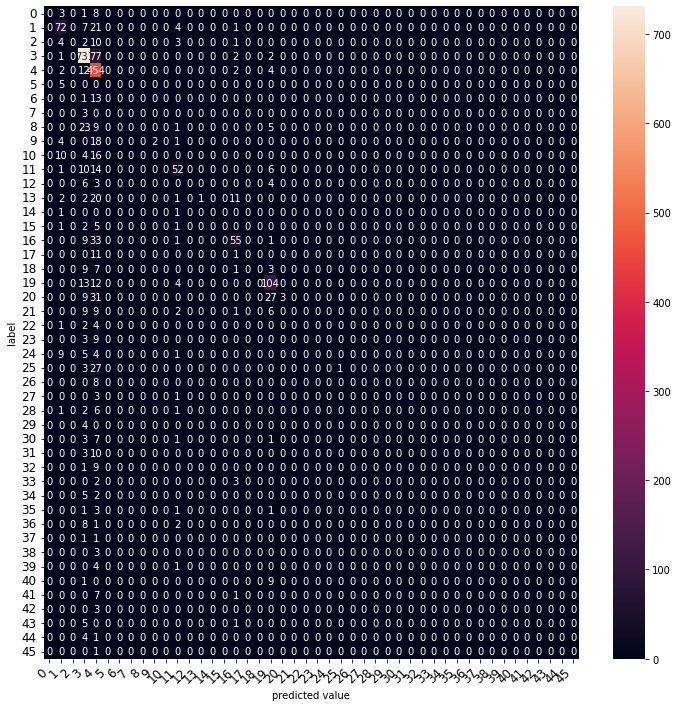

In [ ]:
graph_confusion_matrix(model, tfidfv_test, y_test)

# 4-7. 다양한 머신러닝 모델 사용해보기 (1)

1. Complement Naive Bayes Classifier(CNB)

나이브 베이지안 분류기는 독립 변수가 '조건부로 독립적'이라는 가정을 하기 때문에, 문서가 특정 분류에 속할 실제 확률을 사용할 때 문제가 발생할 수 있습니다. 예를 들어 많은 샘플(sample)이 특정 클래스에 치우쳐져 있을 경우, 결정 경계의 가중치가 한쪽으로 치우쳐져 모델이 특정 클래스를 선호할 수 있어요. 앞서 로이터 뉴스 데이터에서도 3번, 4번 클래스가 다른 클래스에 비해 상대적으로 많은 클래스를 갖고 있음을 확인했었죠.

데이터가 불균형할 경우를 대비해 나이브 베이즈 분류기를 보완한 것이 컴플리먼트 나이브 베이즈 분류기입니다. 컴플리먼트 나이브 베이즈 분류기는 데이터의 불균형을 고려하여 가중치를 부여하는 특징을 가지고 있습니다. 따라서 컴플리먼트 나이브 베이즈 분류기는 나이브 베이즈 분류기(MultinomialNB)보다 성능이 일반적으로 더 좋습니다.

In [ ]:
cb = ComplementNB()
cb.fit(tfidfv, y_train)

ComplementNB()

In [ ]:
predicted = cb.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.7707034728406055


2. 로지스틱 회귀(Logistic Regression)

로지스틱 회귀는 소프트맥스(softmax) 함수를 사용한 다중 클래스 분류 알고리즘을 지원합니다. 다중 클래스 분류를 위한 로지스틱 회귀를 소프트맥스 회귀(Softmax Regression) 라고도 합니다. 주의할 점은 이름은 회귀지만, 실제로는 분류를 수행한다는 점입니다.

![](https://d3s0tskafalll9.cloudfront.net/media/original_images/GN-2-P-7.softmaxregression.png)
<center>로지스틱 회귀</center>

소프트맥스 함수는 클래스가 N개일 때, N차원의 벡터가 '각 클래스가 정답일 확률'을 표현하도록 정규화해주는 함수입니다. 예를 들어 위의 그림은 4차원의 벡터를 입력으로 받으면서 3개의 클래스를 가지는 경우의 소프트맥스 회귀의 동작 과정을 보여주고 있습니다. 3개의 클래스 중 1개의 클래스를 예측해야 하므로 소프트맥스 회귀의 출력은 3차원의 벡터고, 각 벡터의 차원은 특정 클래스일 확률입니다. 오차와 실제값의 차이를 줄이는 과정에서 가중치와 편향이 학습됩니다.

In [ ]:
lr = LogisticRegression(C=10000, penalty='l2', max_iter=3000)
lr.fit(tfidfv, y_train)

LogisticRegression(C=10000, max_iter=3000)

In [ ]:
predicted = lr.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.8107747105966162


3. 선형 서포트 벡터 머신(Linear Support Vector Machine)

[SVM 영상](https://youtu.be/y4CYcpRiNsw)

Q9. 서포트 벡터 머신에서 서포트 벡터란 어떤 벡터를 의미하는지 설명해보세요.
- Decision Boundary와 가장 가까운 각 클래스의 데이터를 서포트 벡터라고 한다.

많은 선형 분류 모델은 태생적으로는 이진 분류만을 지원하는 이진 분류 모델입니다. (위에서 설명한 로지스틱 회귀는 예외입니다.) 서포트 벡터 머신의 구현체인 사이킷런의 LinearSVC 또한 태생적으로는 이진 분류를 위한 모델입니다. 그런데 이진 분류 알고리즘을 다중 클래스 분류 알고리즘으로 사용하는 방법이 있습니다. 바로 일대다(one-vs.-rest 또는 one-vs.-all) 방법입니다. 일대다 방식은 각 클래스를 다른 모든 클래스와 구분하도록 이진 분류 모델을 학습시킵니다.

결국 클래스의 수만큼 이진 분류 모델이 만들어집니다. 예측할 때는 만들어진 모든 이진 분류기가 작동하여 가장 높은 점수를 내는 분류기의 클래스를 예측값으로 선택합니다.



In [ ]:
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=3000, dual=False)
lsvc.fit(tfidfv, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC(C=1000, dual=False, max_iter=3000, penalty='l1')

In [ ]:
predicted = lsvc.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

# 4-8. 다양한 머신러닝 모델 사용해보기 (2)

1. 결정 트리(Decision Tree)

결정 트리는 분류와 회귀 문제에 널리 사용하는 모델입니다. 기본적으로 결정 트리는 결정에 다다르기 위해 '예/아니오' 질문을 이어 나가면서 학습합니다. 이 질문은 스무고개 놀이의 질문과 비슷합니다. 아래의 영상을 통해서 결정 트리에 대해서 이해해 봅시다.

[결정 트리](https://youtu.be/n0p0120Gxqk)



In [ ]:
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(tfidfv, y_train)

In [ ]:
predicted = tree.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

2. 랜덤 포레스트(Random Forest)

앙상블(Ensemble) 이란 여러 머신러닝 모델을 연결하여 더 강력한 모델을 만드는 기법입니다. 뒤에서 보팅(Voting)이라는 앙상블 기법을 알아볼 텐데, 모델 자체가 앙상블을 사용하는 앙상블 모델들도 존재합니다. 랜덤 포레스트와 그래디언트 부스팅 트리는 결정 트리를 사용하는 앙상블 모델입니다.

[랜덤 포레스트](https://youtu.be/nZB37IBCiSA)

Q10. 위 영상에서 언급된 결정 트리의 단점을 랜덤 포레스트는 해결할 수 있다고 합니다. 영상에서 언급된 단점이 무엇이었는지 언급해보고, 랜덤 포레스트가 어떻게 그 문제를 해결할 수 있는지 토의해봅시다.

- 결정 트리는 훈련 데이터에 과적합(Overfitting)되는 경향이 있습니다. 랜덤 포레스트는 이 문제를 앙상블로 해결합니다. 가령 서로 다른 방향으로 과적합된 트리들을 조합하면 오히려 모델 전체에서는 과적합을 피할 수 있다는 것이죠

In [ ]:
forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(tfidfv, y_train)

RandomForestClassifier(n_estimators=5, random_state=0)

In [ ]:
predicted = forest.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.674087266251113


3. 그래디언트 부스팅 트리(GradientBoostingClassifier)

그래디언트 부스팅 트리는 여러 개의 결정 트리를 묶어 만드는 앙상블 모델입니다. 그레디언트 부스팅은 랜덤 포레스트와 다르게 이전 트리의 오차를 보완하는 방식으로 순차적으로 트리를 만듭니다.

그래디언트 부스팅 트리는 일부 특성을 무시한다는 특징을 가지고 있습니다. 그래서 보통 랜덤 포레스트를 먼저 사용해보고, 성능이나 예측 시간 면에서 만족스럽지 않은 경우에 그래디언트 부스팅 트리를 시도해보는 것이 좋습니다.

일반적으로 1 ~ 5 정도의 깊지 않은 트리를 사용하므로 메모리도 적게 사용하고 예측도 빠릅니다.

정확도도 준수하고, 특히 예측 속도가 빠르다는 점에서 데이터 경진 대회에서 많은 우승을 했던 모델입니다. 다만, 훈련 시간의 속도가 좀 오래 걸리고, 트리 기반 모델의 특성으로 인해서 희소한 고차원 데이터에 대해서는 잘 동작하지 않는다는 단점이 있습니다.

현재 우리가 사용하는 TF-IDF 행렬은 희소하고 고차원 데이터지만, 결정 트리나 랜덤 포레스트보다 더 높은 성능을 얻을 수 있을지 한번 테스트해 볼까요?




In [ ]:
grbt = GradientBoostingClassifier(random_state=0) # verbose=3
grbt.fit(tfidfv, y_train)

GradientBoostingClassifier(random_state=0)

In [ ]:
predicted = grbt.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.7662511130899377


4. 보팅(Voting)

데이터 경진 대회 캐글(Kaggle)에서 상위권을 차지한 많은 솔루션들이 앙상블(Ansemble learning)이라는 방법을 사용합니다. 그 중에서 투표를 통해 결과를 도출하는 보팅(Voting) 이라는 방법에 대해서 이해해 봅시다.

[보팅](https://youtu.be/y4Wh0E1d4oE)

Q11. 보팅은 하드 보팅과 소프트 보팅 두 가지로 나누어집니다. 하드 보팅은 결과물에 대한 최종값을 투표해서 결정합니다. 그렇다면, 소프트 보팅의 결정 방식에 대해 설명해보세요.

- 소프트 보팅은 최종 결과물이 나올 확률값을 다 더해서 최종 결과물에 대한 각각의 확률을 구한 뒤 최종값을 도출해 냅니다.

In [ ]:
voting_classifier = VotingClassifier(estimators=[
        ('lr', LogisticRegression(C=10000, max_iter=3000, penalty='l2')),
        ('cb', ComplementNB()),
        ('grbt', GradientBoostingClassifier(random_state=0))], voting='soft')
voting_classifier.fit(tfidfv, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=10000, max_iter=3000)),
                             ('cb', ComplementNB()),
                             ('grbt',
                              GradientBoostingClassifier(random_state=0))],
                 voting='soft')

In [ ]:
predicted = voting_classifier.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.8165627782724845
